In [1]:
import pandas as pd
import numpy as np

In [2]:
#Read the dataset

games= pd.read_csv("C:/Users/lanvu/Downloads/nfl-big-data-bowl-2025/games.csv")
player_play=pd.read_csv("C:/Users/lanvu/Downloads/nfl-big-data-bowl-2025/player_play.csv")
players=pd.read_csv("C:/Users/lanvu/Downloads/nfl-big-data-bowl-2025/players.csv")
plays=pd.read_csv("C:/Users/lanvu/Downloads/nfl-big-data-bowl-2025/plays.csv")
track_w1=pd.read_csv("C:/Users/lanvu\Downloads/nfl-big-data-bowl-2025/tracking_week_1.csv")
track_w2=pd.read_csv('C:/Users/lanvu/Downloads/nfl-big-data-bowl-2025/tracking_week_2.csv')
track_w3=pd.read_csv('C:/Users/lanvu/Downloads/nfl-big-data-bowl-2025/tracking_week_3.csv')
track_w4=pd.read_csv('C:/Users/lanvu/Downloads/nfl-big-data-bowl-2025/tracking_week_4.csv')
track_w5=pd.read_csv('C:/Users/lanvu/Downloads/nfl-big-data-bowl-2025/tracking_week_5.csv')
track_w6=pd.read_csv('C:/Users/lanvu/Downloads/nfl-big-data-bowl-2025/tracking_week_6.csv')
track_w7=pd.read_csv('C:/Users/lanvu/Downloads/nfl-big-data-bowl-2025/tracking_week_7.csv')
track_w8=pd.read_csv('C:/Users/lanvu/Downloads/nfl-big-data-bowl-2025/tracking_week_8.csv')
track_w9=pd.read_csv('C:/Users/lanvu/Downloads/nfl-big-data-bowl-2025/tracking_week_9.csv')


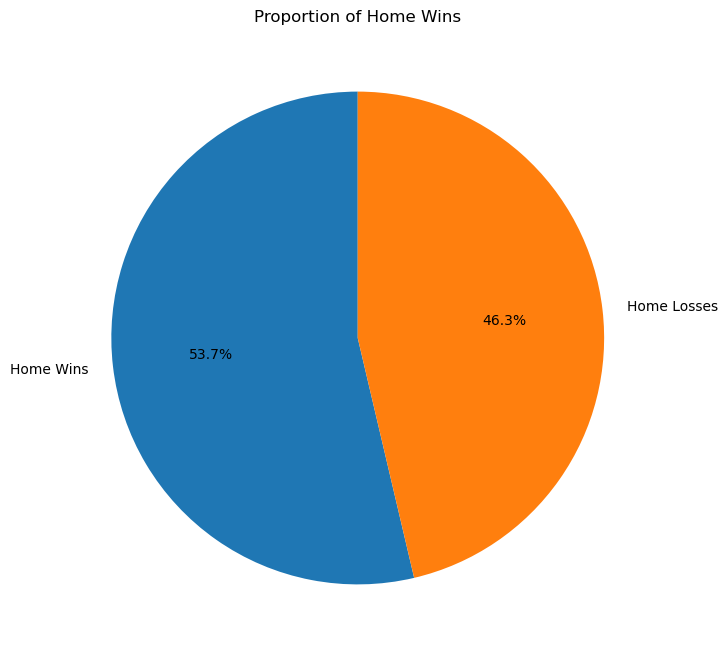

In [3]:
#EDA
import matplotlib.pyplot as plt
games['homeWin'] = games['homeFinalScore'] > games['visitorFinalScore']

# Count wins and losses
win_counts = games['homeWin'].value_counts()

# Prepare labels and values
labels = ['Home Wins', 'Home Losses']
sizes = [win_counts[True], win_counts[False]] if False in win_counts.index else [win_counts[True], 0]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Home Wins')
plt.show()


In [4]:
players.columns

Index(['nflId', 'height', 'weight', 'birthDate', 'collegeName', 'position',
       'displayName'],
      dtype='object')

In [5]:
plays['pff_passCoverage'].unique()

array(['Cover-3', 'Quarters', 'Cover-1', 'Cover 6-Left', 'Cover-2', nan,
       'Cover-0', 'Cover-3 Seam', 'Cover-6 Right', 'Goal Line',
       'Red Zone', '2-Man', 'Cover-3 Double Cloud', 'Bracket',
       'Miscellaneous', 'Cover-3 Cloud Left', 'Prevent', 'Cover-1 Double',
       'Cover-3 Cloud Right'], dtype=object)

                      yardsGained  homeTeamWinProbabilityAdded  \
pff_passCoverage                                                 
2-Man                    6.682796                    -0.001592   
Bracket                  7.053333                     0.004076   
Cover 6-Left             5.829480                    -0.000795   
Cover-0                  3.019835                     0.000489   
Cover-1                  5.781818                     0.000096   
Cover-1 Double           6.388889                     0.005034   
Cover-2                  6.039417                    -0.000699   
Cover-3                  5.623890                     0.000322   
Cover-3 Cloud Left       5.366667                     0.004580   
Cover-3 Cloud Right      6.903226                     0.002780   
Cover-3 Double Cloud    14.222222                    -0.099172   
Cover-3 Seam             6.058176                     0.001554   
Cover-6 Right            6.300000                    -0.000235   
Goal Line 

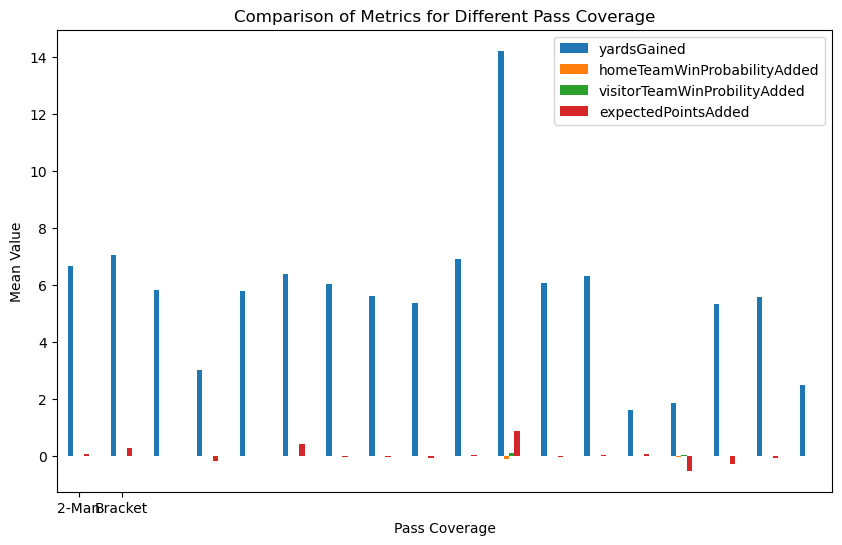

In [6]:
# Select relevant columns
passCoverage_analysis = plays[['pff_passCoverage','yardsGained', 'homeTeamWinProbabilityAdded', 'visitorTeamWinProbilityAdded', 'expectedPointsAdded']]

# Group by isShotgun and calculate the mean for each group
passCoverage_grouped = passCoverage_analysis.groupby('pff_passCoverage').mean()

# Display the results
print(passCoverage_grouped)
# Plot the bar chart
passCoverage_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Metrics for Different Pass Coverage')
plt.xlabel('Pass Coverage')
plt.ylabel('Mean Value')
plt.xticks(ticks=[0, 1], rotation=0)
plt.legend(loc='best')
plt.show()

           yardsGained  homeTeamWinProbabilityAdded  \
isShotgun                                             
False         0.440757                     0.606962   
True          0.443777                     0.606485   

           visitorTeamWinProbilityAdded  expectedPointsAdded  
isShotgun                                                     
False                          0.393038             0.598718  
True                           0.393515             0.597819  


C:\Users\lanvu\AppData\Local\Temp\ipykernel_10924\718202804.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shotgun_analysis[columns_to_normalize] = scaler.fit_transform(shotgun_analysis[columns_to_normalize])


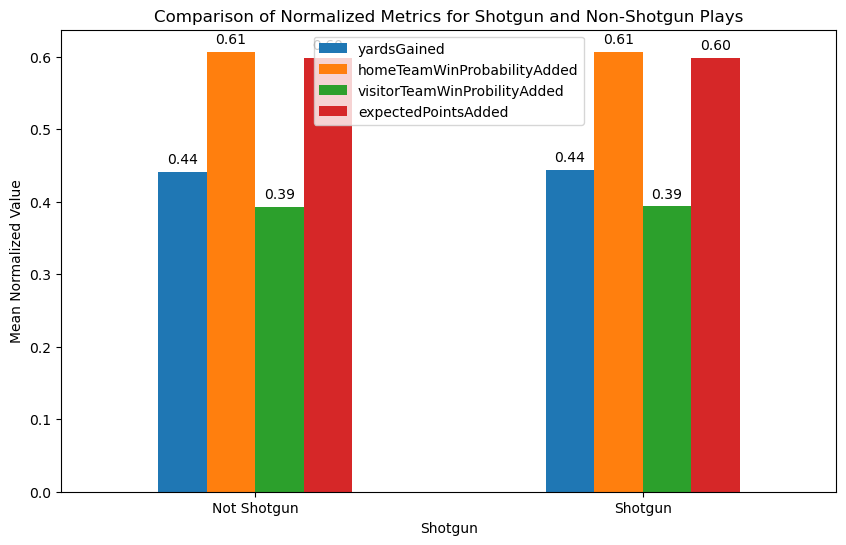

In [7]:
from sklearn.preprocessing import MinMaxScaler
plays['isShotgun'] = plays['playDescription'].str.contains(r'\(Shotgun\)', case=False, na=False)

# Select relevant columns
shotgun_analysis = plays[['isShotgun','yardsGained', 'homeTeamWinProbabilityAdded', 'visitorTeamWinProbilityAdded', 'expectedPointsAdded']]


# Select relevant columns for normalization
columns_to_normalize = ['yardsGained', 'homeTeamWinProbabilityAdded', 'visitorTeamWinProbilityAdded', 'expectedPointsAdded']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected columns
shotgun_analysis[columns_to_normalize] = scaler.fit_transform(shotgun_analysis[columns_to_normalize])

# Group by isShotgun and calculate the mean for each group
shotgun_grouped_normalized = shotgun_analysis.groupby('isShotgun').mean()

# Display the results
print(shotgun_grouped_normalized)

# Plot the bar chart
ax = shotgun_grouped_normalized.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Normalized Metrics for Shotgun and Non-Shotgun Plays')
plt.xlabel('Shotgun')
plt.ylabel('Mean Normalized Value')
plt.xticks(ticks=[0, 1], labels=['Not Shotgun', 'Shotgun'], rotation=0)
plt.legend(loc='best')

# Add values on top of each column
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

In [8]:
# Group by quarter and isShotgun, then count the number of plays
shotgun_count_by_quarter = plays.groupby(['quarter', 'isShotgun'])['playId'].transform('count')

# Display the first few rows to verify the new column
shotgun_count_by_quarter.head()

0    2049
1    2521
2    2521
3    2075
4    2049
Name: playId, dtype: int64

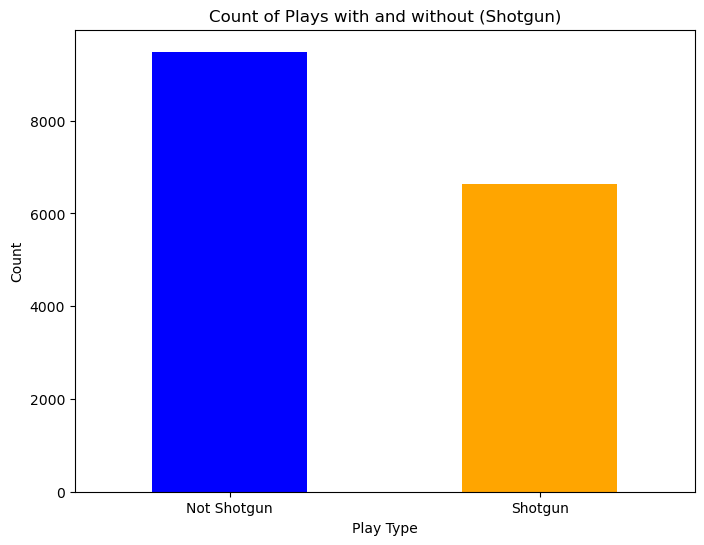

In [9]:
# Check if playDescription contains "(Shotgun)"
plays['isShotgun'] = plays['playDescription'].str.contains(r'\(Shotgun\)', case=False, na=False)

# Count the occurrences
shotgun_counts = plays['isShotgun'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
shotgun_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xticks(ticks=[0, 1], labels=['Not Shotgun', 'Shotgun'], rotation=0)
plt.xlabel('Play Type')
plt.ylabel('Count')
plt.title('Count of Plays with and without (Shotgun)')
plt.show()

In [10]:
runConceptSecondary=plays['pff_runConceptSecondary']
#runConceptSecondary.value_counts().plot(kind='bar')
plays['playDescription'].tail()

16119    (12:49) (Shotgun) T.Lawrence pass incomplete s...
16120    (12:32) (Shotgun) K.Cousins pass incomplete de...
16121    (9:59) (Shotgun) P.Mahomes scrambles right end...
16122    (:45) C.Rush pass incomplete deep right to C.L...
16123    (15:00) Br.Hall up the middle for 34 yards, TO...
Name: playDescription, dtype: object

In [11]:
plays['isDoubleCloud'] = plays['pff_passCoverage'].str.contains('Cover-3 Double Cloud', case=False, na=False)
plays['isDoubleCloud'].value_counts()

False    16115
True         9
Name: isDoubleCloud, dtype: int64

Cover-3                 4956
Cover-1                 3300
Quarters                2073
Cover-2                 1852
Cover 6-Left             692
Cover-6 Right            690
Cover-3 Seam             636
Cover-0                  605
Red Zone                 537
2-Man                    186
Goal Line                146
Bracket                   75
Cover-1 Double            54
Prevent                   46
Cover-3 Cloud Right       31
Cover-3 Cloud Left        30
Miscellaneous             14
Cover-3 Double Cloud       9
Name: pff_passCoverage, dtype: int64


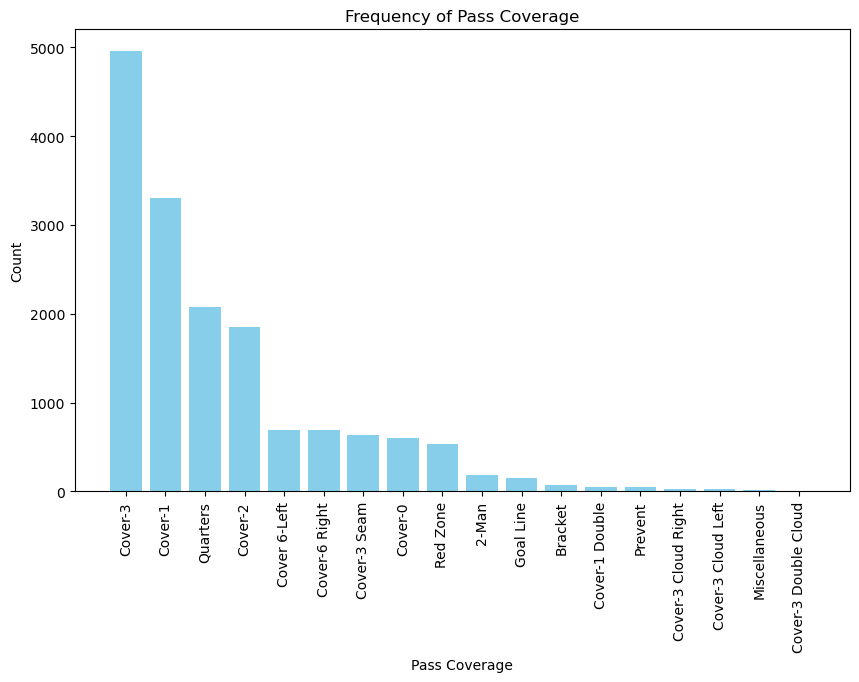

In [12]:
freq_table=plays['pff_passCoverage'].value_counts()
print(freq_table)

plt.figure(figsize=(10, 6))
plt.bar(freq_table.index, freq_table.values, color='skyblue')
plt.xlabel('Pass Coverage')
plt.ylabel('Count')
plt.title('Frequency of Pass Coverage')
plt.xticks(rotation=90)
plt.show()

                      yardsGained  homeTeamWinProbabilityAdded  \
pff_passCoverage                                                 
2-Man                    6.682796                    -0.001592   
Bracket                  7.053333                     0.004076   
Cover 6-Left             5.829480                    -0.000795   
Cover-0                  3.019835                     0.000489   
Cover-1                  5.781818                     0.000096   
Cover-1 Double           6.388889                     0.005034   
Cover-2                  6.039417                    -0.000699   
Cover-3                  5.623890                     0.000322   
Cover-3 Cloud Left       5.366667                     0.004580   
Cover-3 Cloud Right      6.903226                     0.002780   
Cover-3 Double Cloud    14.222222                    -0.099172   
Cover-3 Seam             6.058176                     0.001554   
Cover-6 Right            6.300000                    -0.000235   
Goal Line 

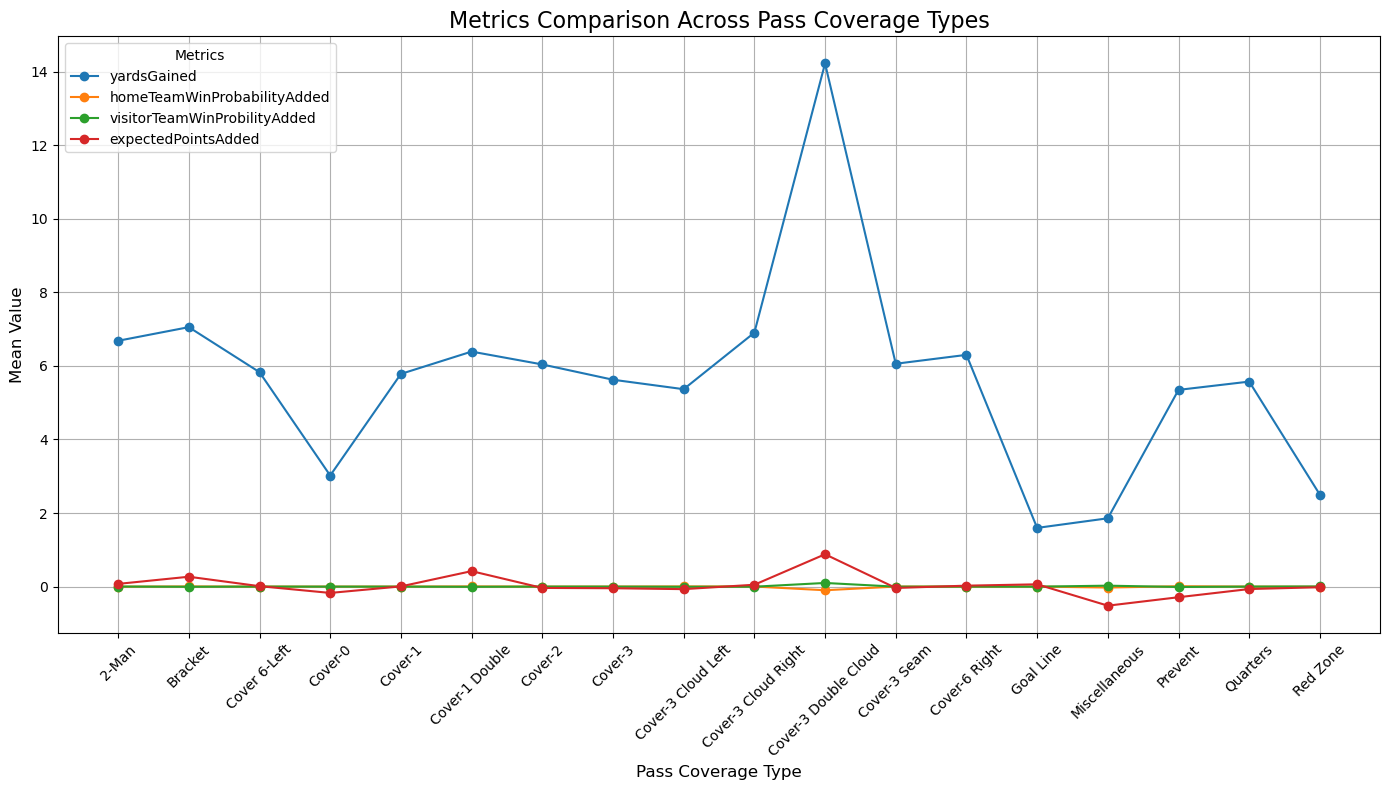

In [13]:
# Select relevant columns
passCoverage_analysis = plays[['pff_passCoverage','yardsGained', 'homeTeamWinProbabilityAdded', 'visitorTeamWinProbilityAdded', 'expectedPointsAdded']]

# Group by isShotgun and calculate the mean for each group
passCoverage_grouped = passCoverage_analysis.groupby('pff_passCoverage').mean()

# Display the results
print(passCoverage_grouped)

# Line chart visualization
plt.figure(figsize=(14, 8))

# Plot each metric as a separate line
for column in passCoverage_grouped.columns:
    plt.plot(passCoverage_grouped.index, passCoverage_grouped[column], marker='o', label=column)

# Enhance the chart
plt.title("Metrics Comparison Across Pass Coverage Types", fontsize=16)
plt.xlabel("Pass Coverage Type", fontsize=12)
plt.ylabel("Mean Value", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Metrics", loc='upper left')
plt.grid(True)

# Show the chart
plt.tight_layout()
plt.show()


<Axes: xlabel='teamAbbr'>

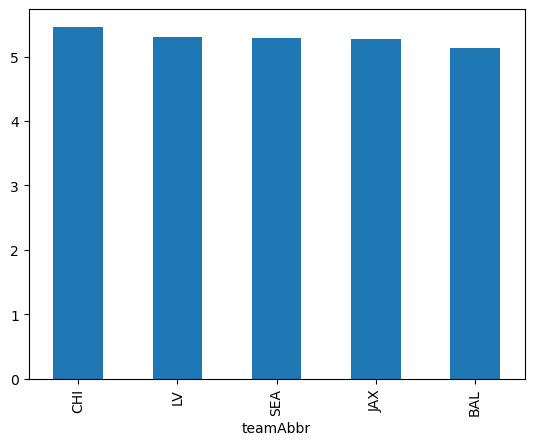

In [14]:
player_play[player_play['hadRushAttempt']==1].groupby(['teamAbbr']).rushingYards.mean().sort_values(ascending=False)[:5]
player_play[player_play['hadRushAttempt']==1].groupby(['teamAbbr']).rushingYards.mean().sort_values(ascending=False)[:5].plot(kind='bar')

<Axes: xlabel='teamAbbr'>

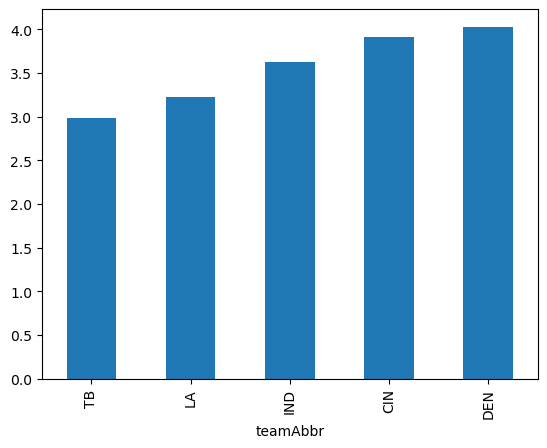

In [15]:
player_play[player_play['hadRushAttempt']==1].groupby(['teamAbbr']).rushingYards.mean().sort_values(ascending=True)[:5].plot(kind='bar')

In [16]:
player_play[player_play['hadPassReception']==1].groupby(['teamAbbr']).receivingYards.mean().sort_values(ascending=False)[:5]

teamAbbr
MIA    12.893720
ATL    12.713115
SF     12.546053
BUF    12.409091
PHI    12.393548
Name: receivingYards, dtype: float64

<Axes: xlabel='teamAbbr'>

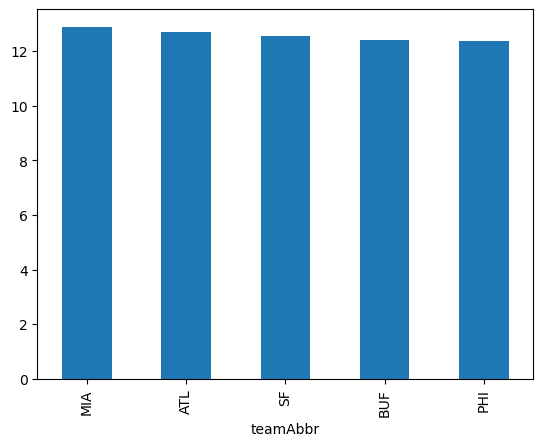

In [17]:
player_play[player_play['hadPassReception']==1].groupby(['teamAbbr']).receivingYards.mean().sort_values(ascending=False)[:5].plot(kind='bar')

In [18]:
avg_rush=player_play[player_play['hadRushAttempt']==1].groupby(['nflId']).rushingYards.mean().sort_values(ascending=False).rename('avg_rush_yards')
num_rush=player_play[player_play['hadRushAttempt']==1].groupby(['nflId']).rushingYards.count().sort_values(ascending=False).rename('num_rush')

In [19]:
rush_stat=pd.concat([avg_rush,num_rush],axis=1).rename_axis('nflId').reset_index()
rusher_stat=pd.merge(left=rush_stat,right=players[['nflId','displayName']],how='inner',on='nflId')
##get only Id and name from players
play_info=plays[['gameId','playId','offenseFormation']].groupby(['gameId','playId','offenseFormation']).count().reset_index(level= ['gameId','playId','offenseFormation'])

rush_stat[rush_stat['num_rush']>10].sort_values(by='avg_rush_yards',ascending=False)

,nflId,avg_rush_yards,num_rush
23,45244,8.657895,38
30,52708,7.909091,11
36,52443,7.393939,33
37,46506,7.117647,17
38,53440,7.089744,78
...,...,...,...
213,54668,2.058824,17
223,46173,2.000000,18
226,38538,1.666667,18
232,33084,1.090909,11


In [20]:
rusher_stat[rusher_stat['num_rush']>10].sort_values(by='avg_rush_yards',ascending=False)[:5]

,nflId,avg_rush_yards,num_rush,displayName
23,45244,8.657895,38,Taysom Hill
30,52708,7.909091,11,Jamycal Hasty
36,52443,7.393939,33,D'Andre Swift
37,46506,7.117647,17,Dontrell Hilliard
38,53440,7.089744,78,Justin Fields


In [46]:
player_rush_yards=player_play[player_play['hadRushAttempt']==1][['nflId','gameId','playId','rushingYards','teamAbbr']].groupby(['nflId','gameId','playId','teamAbbr']).sum().reset_index()
player_rush_att=player_play[player_play['hadRushAttempt']==1][['nflId','gameId','playId']].groupby(['nflId','gameId']).mean().reset_index()
player_rush_stats=pd.merge(left=player_rush_yards,right=player_rush_att,how='inner',on=['nflId','gameId','playId'])
rush_stat=pd.concat([avg_rush,num_rush],axis=1).rename_axis('nflId').reset_index()
rusher_stat=pd.merge(left=player_rush_yards,right=players[['nflId','displayName']],how='inner',on='nflId')
##get only Id and name from players
play_info=plays[['gameId','playId','offenseFormation']].groupby(['gameId','playId','offenseFormation']).count().reset_index(level= ['gameId','playId','offenseFormation'])
player_rec_yards=player_play[player_play['hadPassReception']==1][['nflId','gameId','playId','receivingYards','teamAbbr']].groupby(['nflId','gameId','playId','teamAbbr']).sum().reset_index()
rec_stat=pd.merge(left=player_rec_yards,right=players[['nflId','displayName']],how='inner',on='nflId')
rec_data=pd.merge(left=rec_stat,right=play_info,how='inner',on=['playId','gameId'])
rush_data=pd.merge(left=rusher_stat,right=play_info,how='inner',on=['playId','gameId'])
yard_data=pd.concat([rush_data,rec_data],axis=0)
yard_data_enh=pd.merge(left=yard_data,right=plays[['gameId','playId','receiverAlignment','passResult']],how='inner',on=['gameId','playId'])

C:\Users\lanvu\AppData\Local\Temp\ipykernel_10924\3281365886.py:3: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  player_rush_stats=pd.merge(left=player_rush_yards,right=player_rush_att,how='inner',on=['nflId','gameId','playId'])


In [47]:
len(yard_data_enh)

12248

In [23]:
player_rec_yards=player_play[player_play['hadPassReception']==1][['nflId','gameId','playId','receivingYards','teamAbbr']].groupby(['nflId','gameId','playId','teamAbbr']).sum().reset_index()
rec_stat=pd.merge(left=player_rec_yards,right=players[['nflId','displayName']],how='inner',on='nflId')
rec_data=pd.merge(left=rec_stat,right=play_info,how='inner',on=['playId','gameId'])

In [24]:
rec_data[['offenseFormation','receivingYards']].groupby('offenseFormation').mean()

,receivingYards
offenseFormation,
EMPTY,10.341270
I_FORM,12.094675
JUMBO,3.533333
PISTOL,11.568182
SHOTGUN,10.730003
SINGLEBACK,12.289744
WILDCAT,9.900000


In [25]:
rec_data[['offenseFormation','receivingYards']].groupby('offenseFormation').count()

,receivingYards
offenseFormation,
EMPTY,756
I_FORM,169
JUMBO,15
PISTOL,132
SHOTGUN,3763
SINGLEBACK,780
WILDCAT,10


In [26]:
rush_data[['teamAbbr','rushingYards','offenseFormation']].groupby(['teamAbbr','offenseFormation']).mean()

rushingYards
teamAbbr offenseFormation              
ARI      EMPTY                 6.000000
         I_FORM                2.000000
         PISTOL                5.000000
         SHOTGUN              10.076923
ATL      EMPTY                 3.000000
...                                 ...
TEN      PISTOL                2.000000
         SHOTGUN               5.500000
WAS      EMPTY                 5.500000
         SHOTGUN               6.812500
         SINGLEBACK            4.000000

[96 rows x 1 columns]

In [27]:
rush_data[['offenseFormation','rushingYards']].groupby(['offenseFormation']).mean().sort_values(by='rushingYards',ascending=False)

,rushingYards
offenseFormation,
SHOTGUN,7.962687
EMPTY,7.729167
PISTOL,5.823529
SINGLEBACK,5.716981
I_FORM,5.230769
JUMBO,5.000000


In [28]:
rush_data[['offenseFormation','rushingYards']].groupby(['offenseFormation']).count()

,rushingYards
offenseFormation,
EMPTY,48
I_FORM,13
JUMBO,1
PISTOL,17
SHOTGUN,268
SINGLEBACK,53


In [29]:
yard_data[yard_data['teamAbbr']=='ARI'][['offenseFormation','rushingYards','receivingYards']].groupby('offenseFormation').mean()

,rushingYards,receivingYards
offenseFormation,,
EMPTY,6.000000,8.352941
I_FORM,2.000000,NaN
PISTOL,5.000000,8.428571
SHOTGUN,10.076923,9.345029
SINGLEBACK,NaN,6.000000


In [30]:
yard_data[yard_data['teamAbbr']=='ARI'][['gameId','offenseFormation','rushingYards','receivingYards']].groupby(['gameId','offenseFormation']).count()

rushingYards  receivingYards
gameId     offenseFormation                              
2022091110 EMPTY                        0               2
           SHOTGUN                      2              21
2022091811 EMPTY                        0               9
           I_FORM                       1               0
           PISTOL                       0               1
           SHOTGUN                      1              21
2022092510 EMPTY                        0              10
           PISTOL                       0               1
           SHOTGUN                      0              24
           SINGLEBACK                   0               1
2022100203 EMPTY                        0               5
           PISTOL                       0               2
           SHOTGUN                      1              12
2022100911 EMPTY                        0               9
           PISTOL                       1               1
           SHOTGUN                      0              17
2022101609 EMPTY                        1               3
           PISTOL                       0               1
           SHOTGUN                      1              18
2022102000 EMPTY                        0               3
           SHOTGUN                      1              16
2022103005 EMPTY                        0               5
           SHOTGUN                      3              25
2022110608 EMPTY                        0               5
           PISTOL                       0               1
           SHOTGUN                      4              17

In [31]:
yard_data[yard_data['teamAbbr']=='TB'][['displayName','offenseFormation','receivingYards']].groupby(['displayName','offenseFormation']).mean()

receivingYards
displayName       offenseFormation                
Breshad Perriman  SHOTGUN                11.000000
                  SINGLEBACK             24.000000
Cade Otton        SHOTGUN                10.904762
Cameron Brate     SHOTGUN                 7.727273
                  SINGLEBACK             14.500000
Chris Godwin      EMPTY                   5.500000
                  SHOTGUN                 9.964286
                  SINGLEBACK             15.750000
Cole Beasley      SHOTGUN                 4.250000
Jaelon Darden     SHOTGUN                 1.000000
                  SINGLEBACK             25.000000
Julio Jones       EMPTY                  13.000000
                  SHOTGUN                16.000000
Ko Kieft          SHOTGUN                14.000000
                  SINGLEBACK             18.000000
Kyle Rudolph      I_FORM                 12.000000
Leonard Fournette JUMBO                   1.000000
                  PISTOL                 11.000000
                  SHOTGUN                 7.764706
                  SINGLEBACK             11.333333
Mike Evans        EMPTY                   4.000000
                  I_FORM                 18.333333
                  PISTOL                 34.500000
                  SHOTGUN                12.718750
                  SINGLEBACK             11.000000
Rachaad White     EMPTY                   3.500000
                  PISTOL                  0.000000
                  SHOTGUN                 5.250000
                  SINGLEBACK             11.000000
Russell Gage      EMPTY                  10.000000
                  SHOTGUN                 8.000000
Scott Miller      SHOTGUN                 7.388889
Tom Brady         SHOTGUN                      NaN

In [32]:
yard_data

,nflId,gameId,playId,teamAbbr,rushingYards,displayName,offenseFormation,receiverAlignment,passResult,receivingYards
0,25511,2022102301,2725,TB,1.0,Tom Brady,SHOTGUN,2x2,R,NaN
1,25511,2022102700,3083,TB,1.0,Tom Brady,SHOTGUN,2x2,R,NaN
2,29851,2022091812,663,GB,7.0,Aaron Rodgers,SHOTGUN,2x2,R,NaN
3,29851,2022100211,1704,GB,1.0,Aaron Rodgers,SHOTGUN,2x2,R,NaN
4,29851,2022103012,3161,GB,11.0,Aaron Rodgers,EMPTY,3x2,R,NaN
...,...,...,...,...,...,...,...,...,...,...
5620,55157,2022102303,1264,DAL,NaN,Peyton Hendershot,SINGLEBACK,3x1,C,3.0
5621,55157,2022102303,3435,DAL,NaN,Peyton Hendershot,SINGLEBACK,2x2,C,2.0
5622,55157,2022103002,491,DAL,NaN,Peyton Hendershot,SHOTGUN,3x1,C,11.0
5623,55157,2022103002,544,DAL,NaN,Peyton Hendershot,SHOTGUN,3x1,C,4.0


In [33]:
yard_data_enh['rush'] = yard_data_enh['rushingYards'].apply(lambda x: 0 if pd.isna(x) else 1)

In [48]:
yard_data_enh

,nflId,gameId,playId,teamAbbr,rushingYards,displayName,offenseFormation,receivingYards,receiverAlignment,passResult
0,25511,2022091804,576,TB,0.0,Tom Brady,SINGLEBACK,NaN,2x2,NaN
1,25511,2022101607,3652,TB,0.0,Tom Brady,SINGLEBACK,NaN,3x1,NaN
2,25511,2022102301,2725,TB,1.0,Tom Brady,SHOTGUN,NaN,2x2,R
3,25511,2022102700,3083,TB,1.0,Tom Brady,SHOTGUN,NaN,2x2,R
4,29851,2022091812,663,GB,7.0,Aaron Rodgers,SHOTGUN,NaN,2x2,R
...,...,...,...,...,...,...,...,...,...,...
12243,55157,2022102303,1264,DAL,NaN,Peyton Hendershot,SINGLEBACK,3.0,3x1,C
12244,55157,2022102303,3435,DAL,NaN,Peyton Hendershot,SINGLEBACK,2.0,2x2,C
12245,55157,2022103002,491,DAL,NaN,Peyton Hendershot,SHOTGUN,11.0,3x1,C
12246,55157,2022103002,544,DAL,NaN,Peyton Hendershot,SHOTGUN,4.0,3x1,C


In [51]:
yard_data_enh=yard_data_enh.reset_index()
yard_data_enh.drop('index',axis=1,inplace=True)

In [55]:
yard_data_enh['rush'] = yard_data_enh['rushingYards'].apply(lambda x: 0 if pd.notnull(x) else 1)

In [57]:
##Basic logistics


catagorical_var =['offenseFormation','teamAbbr','passResult','receiverAlignment']
target_var = 'rush'

x=yard_data_enh[catagorical_var]
y=yard_data_enh[target_var]

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Assuming x and y are already defined
x = yard_data_enh[catagorical_var]  # Ensure x is a DataFrame
y = yard_data_enh[target_var]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

preprocessing = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), catagorical_var)]
)

# Define the model
log_model = Pipeline(
    steps=[
        ('preprocessor', preprocessing),
        ('classifier', LogisticRegression())
    ]
)

log_model.fit(X_train, y_train)
y_predict = log_model.predict(X_test)
log_model_accuracy = log_model.score(X_test, y_test)

In [71]:
print('Logistic Regression Model Accuracy:', log_model_accuracy)

Logistic Regression Model Accuracy: 1.0
